<a href="https://colab.research.google.com/github/mekhiya/pytorch-playground/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Computer vision
1 . Prepare data
  - torchvision.transform
  - torch.utils.data.Dataset
  - torch.utils.data.DataLoader

2. Build / Train / Pick model
  - torch.nn.Module
  - torchvision.models

  Loss fn & optimizer
  - torch.optimizer

3. Fit data

4. Eval
  - torcmetrics

5. Imporve through experimentation
  - torch.utils.tensorboard

6. save / reload trained model
  - torch.save
  - torce.load

"""

'\nComputer vision\n1 . Prepare data\n  - torchvision.transform\n  - torch.utils.data.Dataset\n  - torch.utils.data.DataLoader\n\n2. Build / Train / Pick model\n  - torch.nn.Module\n  - torchvision.models\n\n  Loss fn & optimizer\n  - torch.optimizer\n\n3. Fit data\n\n4. Eval\n  - torcmetrics\n\n5. Imporve through experimentation\n  - torch.utils.tensorboard\n\n6. save / reload trained model\n  - torch.save\n  - torce.load\n\n'

# Convolutional neural network


In [2]:
## Computer vision library in pytorch
# torchvision
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu118
0.16.0+cu118


In [3]:
# Dataset - FashionMNIST
# Hello world of computer vision

# setup training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True, # True means  we want training data
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data =  datasets.FashionMNIST(
    root="data",
    train=False, # True means  we want training data
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17590452.22it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269589.92it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5008380.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5764088.89it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


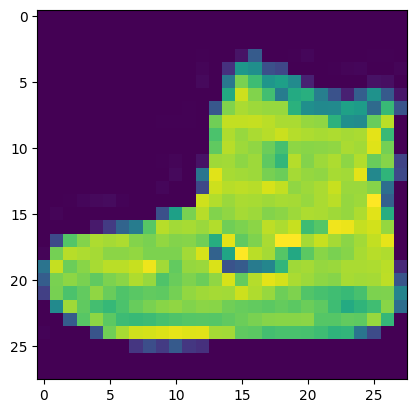

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]

train_data.targets
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")
# image
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

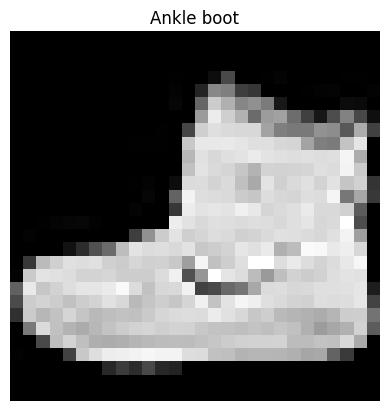

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


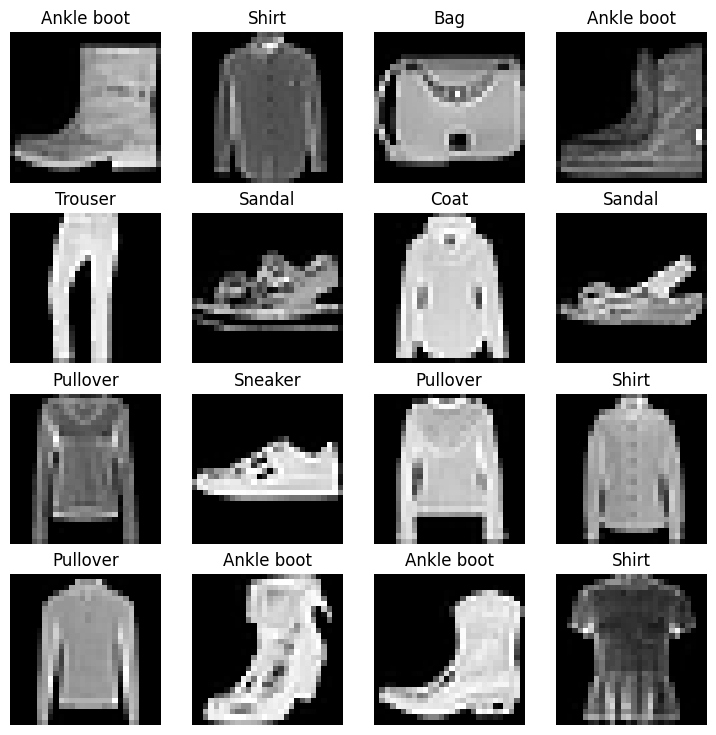

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
  # print(1)
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


# Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linearities?

In [10]:
## 2. Prepare DataLoader

# Right now, our data is in the form of PyTorch Datasets
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
# DataLoader turns our dataset into a PyThon iterable
# More specifically, we want to turn our data into batches (or mini-batches).
# why would we do this?
# 1. It is mor computationally efficient, as in, your computing hardware may not be
# able to look (store in memory) at 60000 images in one hit. So we break it down to
# 32 images at a time (batch size)

# 2. It gives our neural network more chances to update its gradient per epoch.

In [12]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameters
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ea6430a7e50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ea6430a7340>)

In [13]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


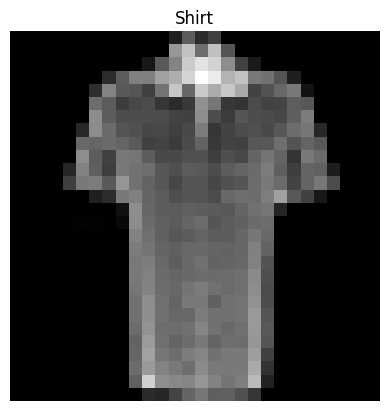

In [14]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling expriments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiements.

In other words: start and add complexity when necessary.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# x.shape gives torch.Size([1, 28, 28])

# Flatten the sample
output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape before flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
Shape before flattening: torch.Size([1, 784])


In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)
# model_0

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

In [19]:
from matplotlib import path
# Loss function - multi-class data - nn.CrossEntrpyLoss()
# Optimizer - SGD
# Evaluation materic - accuracy as evaluation

import requests
from pathlib import Path

# download helped function
if Path("helper_functions.py").is_file():
  print(f"helper_functions.py already exists, skipping download...")
else:
  print(f"Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mekhiya/pytorch-playground/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [20]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [21]:
# Creating a function to time our experiments
# - track - Model's performance (loss & accuracy)
# track - how fast it runs

from timeit import default_timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """
  Print the difference start & end time
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data
"""
1) Loop throug hepochs
2) loop through training batches - perform training steps, calculate loss per batch
3) loop through testing batches - perform testing steps, calculate loss per batch
4) Print out what;s happening
5) Time it all

"""

In [22]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# Training & test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--")

  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    #1. Forward Pass
    y_pred = model_0(X)

    #2. calcaualte loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    #3. Optimizer
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5 optimizer step
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  # Divide
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. Calcualate loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. calcaualte accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# end time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5904 | test loss: 0.5095, Test acc: 82.0387
Epoch: 1
--
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4763 | test loss: 0.4799, Test acc: 83.1969
Epoch: 2
--
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4550 | test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 23.316 seconds


In [23]:
### 4. Make predicition function

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data loader.."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

      # scale loss and acc to find the average loss/acc batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

# calculate model 0 results on test dataset



In [24]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [25]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [26]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [27]:
# create instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [28]:
# setup loss fn & optimizer

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation code
# training loop - train_step()
# testing loop - test_step()

In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc  = 0,0
  model.train()

  for batch, (X,y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    # 1. Forward Pass
    y_pred = model(X)

    # 2 Calucalte loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. topmizer step
    optimizer.step()

    # Print statement

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss: {train_loss:.5f} | train acc: {train_acc:.2f}%")

In [30]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred = model(X)

      # 2. Calcualate loss
      test_loss += loss_fn(test_pred, y)

      # 3. calcaualte accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # print
    print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc: .2f}%\n")

In [31]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# Training & test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--")
  device = "cuda" if torch.cuda.is_available() else "cpu"
  # device = "cuda" if torch.cuda.is_available() else "cpu"
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--
train loss: 1.09199 | train acc: 61.34%
Test Loss: 0.92727 | Test acc:  66.00%

Epoch: 1
--
train loss: 0.73779 | train acc: 73.69%
Test Loss: 0.68793 | Test acc:  75.43%

Epoch: 2
--
train loss: 0.66776 | train acc: 76.08%
Test Loss: 0.64329 | Test acc:  76.87%

Train time on cpu: 37.713 seconds


In [32]:
# get model_1 results
model_1_results = eval_model( model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)

  0%|          | 0/1875 [00:00<?, ?it/s]

In [33]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6432912945747375,
 'model_acc': 76.87166666666667}

## Model 2: Building a Convolutional Neural Network (CNN)
# CNN's ConvNets
# Finds pattern in visual data

In [34]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x



In [35]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


In [36]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image\n: {test_image}")

image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image
: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [38]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image)
conv_output, test_image.shape


(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

In [39]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [40]:
# Training & testing model_2

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2,
                                            train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
train loss: 0.58653 | train acc: 78.74%
Test Loss: 0.39255 | Test acc:  86.04%

Epoch: 1
---
train loss: 0.36231 | train acc: 86.89%
Test Loss: 0.35723 | Test acc:  86.70%

Epoch: 2
---
train loss: 0.32485 | train acc: 88.22%
Test Loss: 0.32124 | Test acc:  88.02%

Train time on cpu: 108.638 seconds


In [41]:
# model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [42]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### 8 compare model results and train time

In [43]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.643291,76.871667
2,FashionMNISTModelV2,0.321237,88.019169


In [44]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,23.316316
1,FashionMNISTModelV1,0.643291,76.871667,37.712525
2,FashionMNISTModelV2,0.321237,88.019169,108.638070


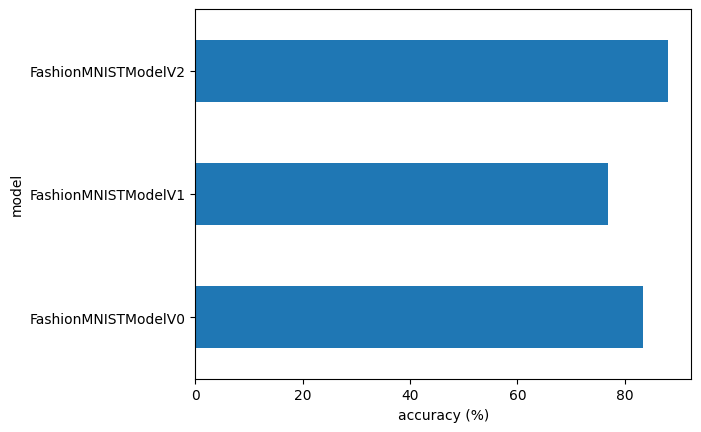

In [45]:
# visualize
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [46]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [47]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

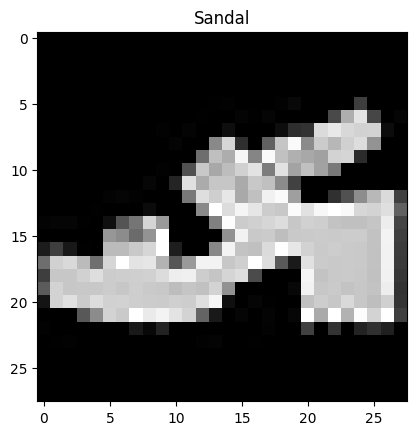

In [48]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [49]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first 2 predicitons
pred_probs[:2], test_labels

(tensor([[1.7889e-07, 3.0100e-07, 7.4711e-08, 2.9112e-07, 4.0070e-08, 9.9988e-01,
          9.7217e-07, 1.5529e-05, 4.1133e-05, 6.1028e-05],
         [8.4885e-02, 5.9099e-01, 1.6154e-03, 1.5859e-01, 3.7294e-02, 1.3594e-04,
          1.2469e-01, 3.1763e-04, 1.2822e-03, 1.8921e-04]]),
 [5, 1, 7, 4, 3, 0, 4, 7, 1])

In [50]:
# prob -> labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

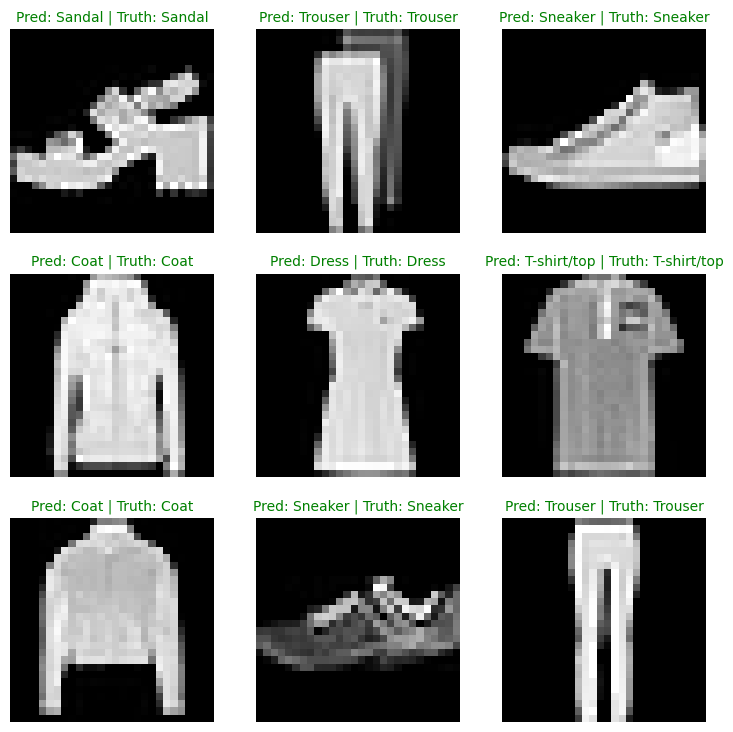

In [51]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # if correct
  else:
    plt.title(title_text, fontsize=10, c="r") # if Incorrect

  plt.axis(False)


In [52]:
# Making confusion marix
import mlxtend
mlxtend.__version__

'0.22.0'

In [58]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [59]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


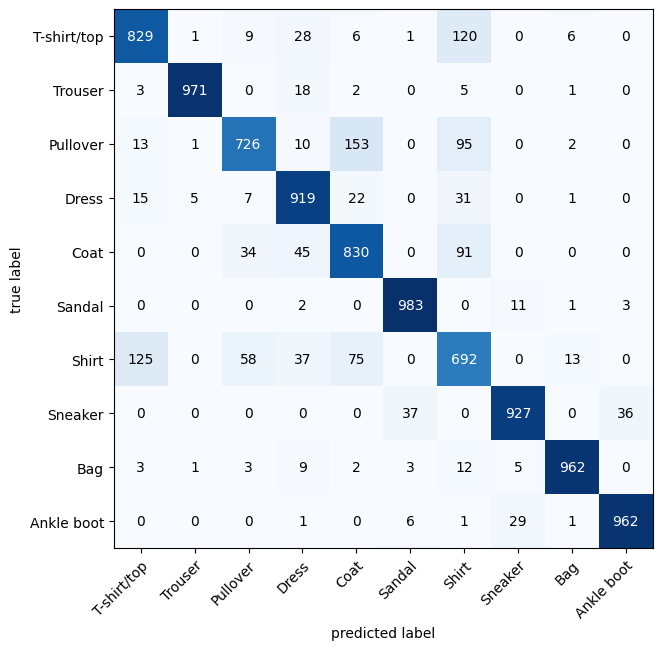

In [60]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [63]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# MODEL_SAVE_PATH

# SAve the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

model_2.state_dict()

Saving model to: models/03_pytorch_computer_vision_model_2.pth


OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3321,  0.2216, -0.4121],
                        [ 0.2544,  0.1519,  0.0460],
                        [-0.3860,  0.0386,  0.4030]]],
              
              
                      [[[-0.3781,  0.3175, -0.0519],
                        [ 0.2455,  0.4040,  0.0624],
                        [-0.0774,  0.3969, -0.0743]]],
              
              
                      [[[-0.1304, -0.0471, -0.0254],
                        [-0.6364, -0.6815,  0.2296],
                        [-0.8089, -0.6727, -0.1372]]],
              
              
                      [[[-0.7881, -0.8915, -0.7144],
                        [ 0.1986, -0.6970,  0.2109],
                        [ 0.3070, -0.0539,  0.3981]]],
              
              
                      [[[-0.0546,  0.2293, -0.0492],
                        [-0.2249,  0.3188, -0.2321],
                        [-0.1437,  0.3618,  0.2411]]],
              
              
      

In [64]:
# create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [65]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results, loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3212365508079529,
  'model_acc': 88.01916932907348},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3212365508079529,
  'model_acc': 88.01916932907348})